In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [2]:
salary_test_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\DataScience\\Assignments\\Naive_Bayes\\SalaryData_Test.csv")
salary_train_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\DataScience\\Assignments\\Naive_Bayes\\SalaryData_Train.csv")

In [3]:
salary_test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
salary_train_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
salary_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
# no null values in the dataset

# EDA

<AxesSubplot:xlabel='age', ylabel='Count'>

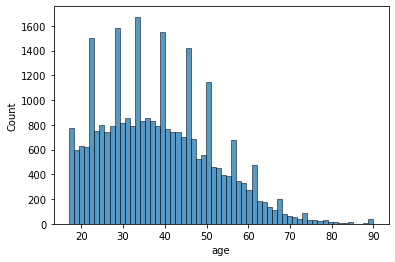

In [8]:
sns.histplot(salary_train_df['age'])

Most od the data has an age group of 20 to 50 

[Text(0, 0, ' State-gov'),
 Text(1, 0, ' Self-emp-not-inc'),
 Text(2, 0, ' Private'),
 Text(3, 0, ' Federal-gov'),
 Text(4, 0, ' Local-gov'),
 Text(5, 0, ' Self-emp-inc'),
 Text(6, 0, ' Without-pay')]

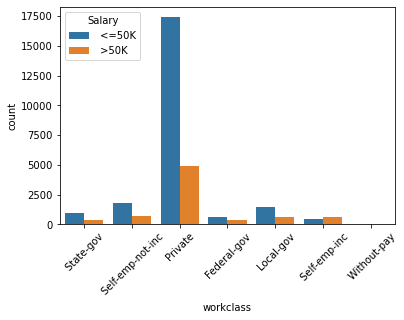

In [9]:
wc=sns.countplot(x=salary_train_df['workclass'],hue=salary_train_df['Salary'],data=salary_train_df)
wc.set_xticklabels(wc.get_xticklabels(), rotation=45)

1.Most of the salaried people are into private sector

2.People who have less than 50k salary are also more in private sector only

[Text(0, 0, ' Bachelors'),
 Text(1, 0, ' HS-grad'),
 Text(2, 0, ' 11th'),
 Text(3, 0, ' Masters'),
 Text(4, 0, ' 9th'),
 Text(5, 0, ' Some-college'),
 Text(6, 0, ' Assoc-acdm'),
 Text(7, 0, ' 7th-8th'),
 Text(8, 0, ' Doctorate'),
 Text(9, 0, ' Assoc-voc'),
 Text(10, 0, ' Prof-school'),
 Text(11, 0, ' 5th-6th'),
 Text(12, 0, ' 10th'),
 Text(13, 0, ' Preschool'),
 Text(14, 0, ' 12th'),
 Text(15, 0, ' 1st-4th')]

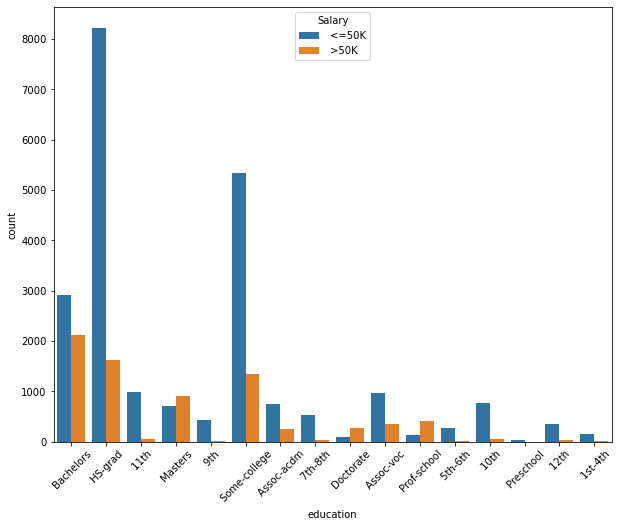

In [10]:
plt.figure(figsize=(10,8))
edu=sns.countplot(x=salary_train_df['education'],hue=salary_train_df['Salary'],data=salary_train_df)
edu.set_xticklabels(edu.get_xticklabels(), rotation=45)

1. Most of the people who earn less than 50k are High School Graduated and the next highest are from some other college and next 
highest hold a Bachelors degree

2. Least are from preschool for income of less than 50k

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16')]

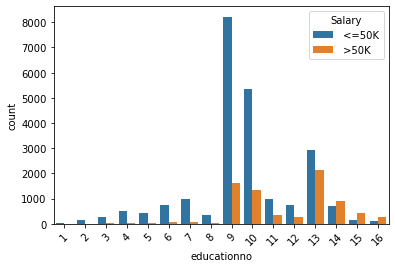

In [11]:
edu_no=sns.countplot(x=salary_train_df['educationno'],hue=salary_train_df['Salary'],data=salary_train_df)
edu_no.set_xticklabels(edu_no.get_xticklabels(), rotation=45)

1. Most of the people had 9 years of education background and people who have less than 50k are more from this category.

[Text(0, 0, ' Never-married'),
 Text(1, 0, ' Married-civ-spouse'),
 Text(2, 0, ' Divorced'),
 Text(3, 0, ' Married-spouse-absent'),
 Text(4, 0, ' Separated'),
 Text(5, 0, ' Married-AF-spouse'),
 Text(6, 0, ' Widowed')]

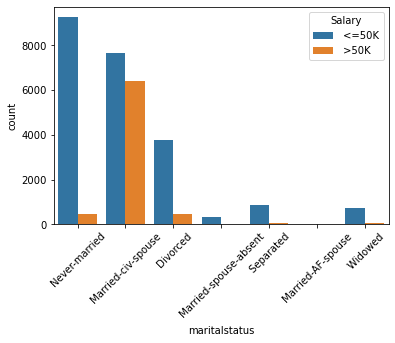

In [12]:
ms=sns.countplot(x=salary_train_df['maritalstatus'],hue=salary_train_df['Salary'],data=salary_train_df)
ms.set_xticklabels(ms.get_xticklabels(), rotation=45)

1. People who earn less than 50k are mostly never married and married civ spouse.
2. People with income more than 50k have mostly married a civ spouse.

[Text(0, 0, ' Adm-clerical'),
 Text(1, 0, ' Exec-managerial'),
 Text(2, 0, ' Handlers-cleaners'),
 Text(3, 0, ' Prof-specialty'),
 Text(4, 0, ' Other-service'),
 Text(5, 0, ' Sales'),
 Text(6, 0, ' Transport-moving'),
 Text(7, 0, ' Farming-fishing'),
 Text(8, 0, ' Machine-op-inspct'),
 Text(9, 0, ' Tech-support'),
 Text(10, 0, ' Craft-repair'),
 Text(11, 0, ' Protective-serv'),
 Text(12, 0, ' Armed-Forces'),
 Text(13, 0, ' Priv-house-serv')]

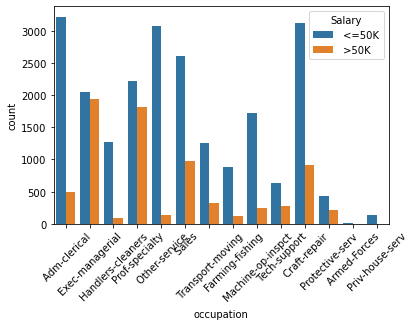

In [13]:
occ=sns.countplot(x=salary_train_df['occupation'],hue=salary_train_df['Salary'],data=salary_train_df)
occ.set_xticklabels(occ.get_xticklabels(), rotation=45)

[Text(0, 0, ' Not-in-family'),
 Text(1, 0, ' Husband'),
 Text(2, 0, ' Wife'),
 Text(3, 0, ' Own-child'),
 Text(4, 0, ' Unmarried'),
 Text(5, 0, ' Other-relative')]

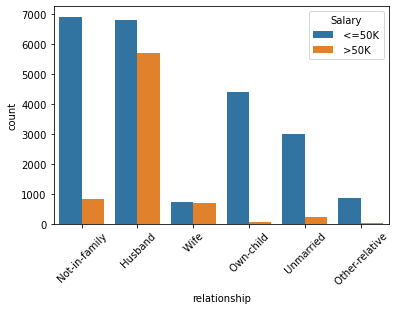

In [14]:
rel=sns.countplot(x=salary_train_df['relationship'],hue=salary_train_df['Salary'],data=salary_train_df)
rel.set_xticklabels(rel.get_xticklabels(), rotation=45)

1. Most of the with less than 50k are not in family and are having a husband and own child
2. People with more than 50k income are having a husband

[Text(0, 0, ' White'),
 Text(1, 0, ' Black'),
 Text(2, 0, ' Asian-Pac-Islander'),
 Text(3, 0, ' Amer-Indian-Eskimo'),
 Text(4, 0, ' Other')]

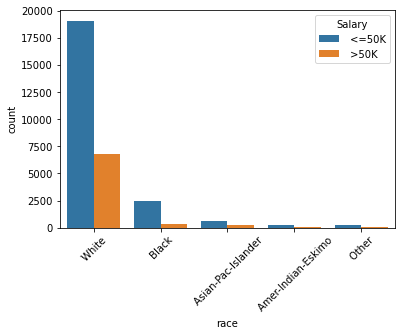

In [15]:
race=sns.countplot(x=salary_train_df['race'],hue=salary_train_df['Salary'],data=salary_train_df)
race.set_xticklabels(race.get_xticklabels(), rotation=45)

People from both the categories are White

[Text(0, 0, ' Male'), Text(1, 0, ' Female')]

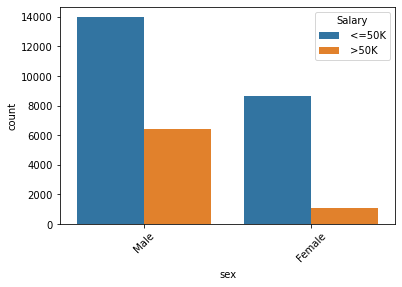

In [16]:
gend=sns.countplot(x=salary_train_df['sex'],hue=salary_train_df['Salary'],data=salary_train_df)
gend.set_xticklabels(gend.get_xticklabels(), rotation=45)

People from both the categories are male 

[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

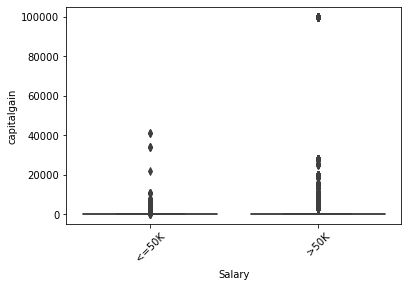

In [17]:
capg=sns.boxplot(y=salary_train_df['capitalgain'],x=salary_train_df['Salary'],data=salary_train_df)
capg.set_xticklabels(capg.get_xticklabels(), rotation=45)

[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

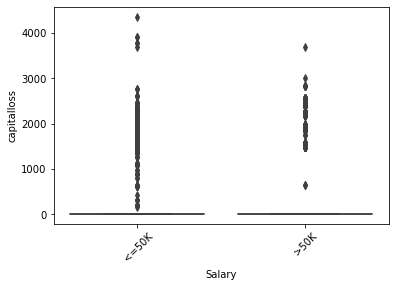

In [18]:
capl=sns.boxplot(y=salary_train_df['capitalloss'],x=salary_train_df['Salary'],data=salary_train_df)
capl.set_xticklabels(capl.get_xticklabels(), rotation=45)

The distribution of capital loss is same in both the categories

[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

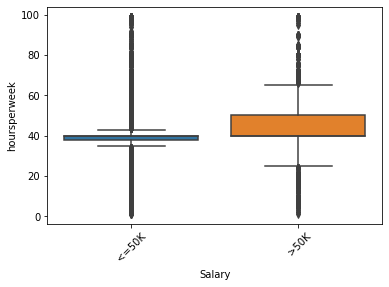

In [19]:
hpw=sns.boxplot(y=salary_train_df['hoursperweek'],x=salary_train_df['Salary'],data=salary_train_df)
hpw.set_xticklabels(hpw.get_xticklabels(), rotation=45)

Hours per week is more for more than 50k salaried people

<AxesSubplot:xlabel='Salary', ylabel='age'>

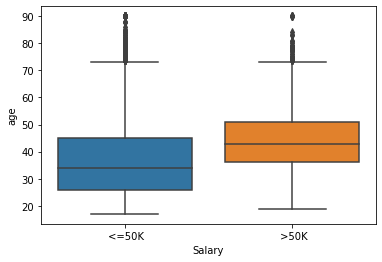

In [20]:
sns.boxplot(x=salary_train_df['Salary'],y=salary_train_df['age'])

<AxesSubplot:xlabel='Salary', ylabel='educationno'>

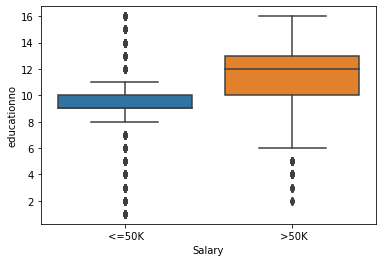

In [21]:
sns.boxplot(x=salary_train_df['Salary'],y=salary_train_df['educationno'])

In [22]:
# Pre Processing the data

In [23]:
# Salary Column:
salary_train_df['Salary']=salary_train_df['Salary'].replace(['<=50K','>50K'],['0','1'],regex=True)
salary_test_df['Salary']=salary_test_df['Salary'].replace(['<=50K','>50K'],['0','1'],regex=True)

In [24]:
# Label encodinng the rest of the columns

label_encoder=preprocessing.LabelEncoder()
col_le=['workclass','education','educationno','maritalstatus','occupation','relationship','race','sex','native']

for i in col_le:
    salary_test_df[i]=label_encoder.fit_transform(salary_test_df[i])
    salary_train_df[i]=label_encoder.fit_transform(salary_train_df[i])

In [25]:
salary_train_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,12,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,12,2,3,0,4,1,0,0,13,37,0
2,38,2,11,8,0,5,1,4,1,0,0,40,37,0
3,53,2,1,6,2,5,0,2,1,0,0,40,37,0
4,28,2,9,12,2,9,5,2,0,0,0,40,4,0


In [26]:
# normalizing the data

from sklearn.preprocessing import MinMaxScaler


In [27]:
x_train=salary_train_df.iloc[:,0:-1]
y_train=salary_train_df.iloc[:,-1]
x_test=salary_test_df.iloc[:,0:-1]
y_test=salary_test_df.iloc[:,-1]

In [28]:
minMax=MinMaxScaler()
# train data
minMax.fit(x_train)
x_train=minMax.transform(x_train)
# test data
minMax.fit(x_test)
x_test=minMax.transform(x_test)

In [29]:
salary_test_df.shape

(15060, 14)

In [30]:
# Dimension reduction using PCA as it is taking much time to execute using SVM

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca=PCA()
pc_values=pca.fit_transform(x_train)

In [33]:
var=pca.explained_variance_ratio_

In [34]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([37.32, 50.55, 60.99, 70.  , 77.11, 83.06, 86.8 , 90.12, 93.35,
       96.32, 98.09, 99.26, 99.99])

In [35]:
import matplotlib.pyplot as plt

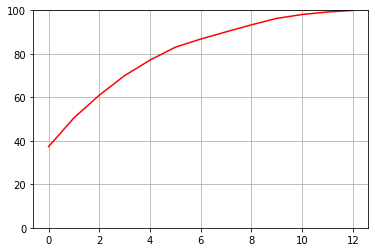

In [36]:
plt.plot(var1,color="red")
plt.ylim(0,100)
plt.grid()

In [37]:
# 80 % of the data is covered with 5 pc's

In [38]:
# considering 5 components as 80% of the data is covered in it
pca=PCA()
pca_train=PCA(n_components=5)
pc_values_train=pca_train.fit_transform(x_train)

pca_test=PCA(n_components=5)
pc_values_test=pca_train.fit_transform(x_test)

In [39]:
pc_values_test.shape

(15060, 5)

In [40]:
pc_train=pd.DataFrame(pc_values_train,columns=['pc1','pc2','pc3','pc4','pc5'])
pc_train

pc_test=pd.DataFrame(pc_values_test,columns=['pc1','pc2','pc3','pc4','pc5'])
pc_test

,pc1,pc2,pc3,pc4,pc5
0,-0.079508,0.000802,0.847002,0.112688,0.209752
1,-0.424842,-0.179029,-0.081614,0.033488,-0.042203
2,-0.431156,0.300715,0.072747,0.139434,-0.035714
3,-0.403302,-0.023324,-0.223071,-0.180012,0.012899
4,-0.295943,0.068150,0.699975,0.343592,-0.123792
...,...,...,...,...,...
15055,-0.122406,0.236714,0.324636,-0.278168,0.188773
15056,0.493457,0.263226,-0.442212,0.423731,-0.019931
15057,-0.446484,0.225078,-0.075347,0.073380,-0.042255
15058,-0.127849,-0.467234,0.022282,0.053222,0.621856


# SVM

In [41]:
# SVM using linear model
#       model_linear=svm.SVC(kernel='linear',C=1).fit(x_train.iloc[0:500,:],y_train[0:500])
 #       pred_linear=model_linear.predict(x_test)
 #       print(metrics.accuracy_score(y_test,pred_linear))

In [42]:
# SVM using linear model

c=[*range(1,50,10),0.1,0.001,0.00001]

for i in range(0,len(c)):
    model_linear=svm.SVC(kernel='linear',C=c[i]).fit(pc_train,y_train)
    pred_linear=model_linear.predict(pc_test)
    print("Accuracy for C=",c[i]," is :", metrics.accuracy_score(y_test,pred_linear))

Accuracy for C= 1  is : 0.7543160690571049
Accuracy for C= 11  is : 0.7543160690571049
Accuracy for C= 21  is : 0.7543160690571049
Accuracy for C= 31  is : 0.7543160690571049
Accuracy for C= 41  is : 0.7543160690571049
Accuracy for C= 0.1  is : 0.7543160690571049
Accuracy for C= 0.001  is : 0.7543160690571049
Accuracy for C= 1e-05  is : 0.7543160690571049


For any value of C , the accuracy is same ..so C=1 is better for Linear model

In [44]:
# SVM using rbf model

gamma=[*range(1,50,10),0.1,0.01,0.001,0.00001]

for i in range(0,len(gamma)):
    model_rbf=svm.SVC(C=1, kernel='rbf',gamma=gamma[i]).fit(pc_train,y_train)
    pred_rbf=model_rbf.predict(pc_test)
    print("Accuracy for gamma =",gamma[i],"is ",metrics.accuracy_score(y_test,pred_rbf))

Accuracy for gamma = 1 is  0.7805444887118194
Accuracy for gamma = 11 is  0.8107569721115537
Accuracy for gamma = 21 is  0.8174634794156707
Accuracy for gamma = 31 is  0.8193227091633466
Accuracy for gamma = 41 is  0.8189243027888446
Accuracy for gamma = 0.1 is  0.7543160690571049
Accuracy for gamma = 0.01 is  0.7543160690571049
Accuracy for gamma = 0.001 is  0.7543160690571049
Accuracy for gamma = 1e-05 is  0.7543160690571049


Gamma = 31 has got the best accuracy in rbf model 

In [45]:
# SVM using polynomial model
for i in range(1,14,2):
    model_poly=svm.SVC(C=1, kernel='poly',degree=i).fit(pc_train,y_train)
    pred_poly=model_poly.predict(pc_test)
    print(" Accuracy for degree ",i,"is ",metrics.accuracy_score(y_test,pred_poly))

 Accuracy for degree  1 is  0.7543160690571049
 Accuracy for degree  3 is  0.7614873837981407
 Accuracy for degree  5 is  0.7644754316069057
 Accuracy for degree  7 is  0.7658034528552456
 Accuracy for degree  9 is  0.7636786188579018
 Accuracy for degree  11 is  0.7610889774236388
 Accuracy for degree  13 is  0.7589641434262948


In [46]:
# Using GridSearchCv to find the best possible kernal and their parameters

In [47]:
param_grid = [{'kernel' : ["linear","poly","rbf","sigmoid"] ,
               'gamma' : [*range(1,50,10),0.1,0.001,0.00001] ,
                'C':[1,15,14,13,12,11,10,0.1]  }]

In [ ]:
model=svm.SVC()
gscv=GridSearchCV(model,param_grid,cv=10).fit(pc_train,y_train)

In [ ]:
gscv.best_params_,gscv.best_score_